In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split                                                                                                          
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, roc_auc_score  

In [2]:
df=pd.read_csv('AI_Human.csv')

In [3]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [36]:
df.columns

Index(['text', 'generated'], dtype='object')

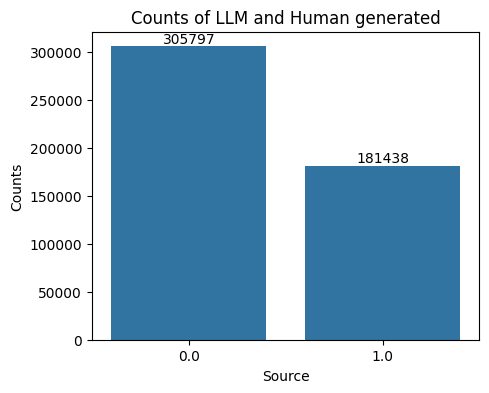

In [37]:
value_counts = df['generated'].value_counts()
plt.figure(figsize=(5, 4))
# Create a bar plot using Seaborn
ax = sns.barplot(x=value_counts.index, y=value_counts.values)

# Annotate each bar with its count number
for i, count in enumerate(value_counts.values):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Source')
plt.ylabel('Counts')
plt.title('Counts of LLM and Human generated')

# Show the plot
plt.show()

In [4]:
df1=df[df['generated']==1].head(25000)

In [5]:
df2=df[df['generated']==0].head(25000)

In [6]:
df3=pd.concat([df1,df2])

In [7]:
final_df=df3.sample(frac=1).reset_index(drop=True)

In [8]:
final_df.head()

,text,generated
0,A Cowboy Who Rode the Waves\n\nTitle: A Cowboy...,1.0
1,"Mostly everyone is aware of the so called ""glo...",0.0
2,"Driverless cars, also known as autonomous veh...",1.0
3,When people ask for advice they usually ask fo...,0.0
4,The history of mathematics is filled with inte...,1.0


In [9]:
final_df['word_tokens']=final_df['text'].apply(word_tokenize)

In [10]:
final_df.head()

,text,generated,word_tokens
0,A Cowboy Who Rode the Waves\n\nTitle: A Cowboy...,1.0,"[A, Cowboy, Who, Rode, the, Waves, Title, :, A..."
1,"Mostly everyone is aware of the so called ""glo...",0.0,"[Mostly, everyone, is, aware, of, the, so, cal..."
2,"Driverless cars, also known as autonomous veh...",1.0,"[Driverless, cars, ,, also, known, as, autonom..."
3,When people ask for advice they usually ask fo...,0.0,"[When, people, ask, for, advice, they, usually..."
4,The history of mathematics is filled with inte...,1.0,"[The, history, of, mathematics, is, filled, wi..."


In [11]:
from nltk.corpus import stopwords

In [12]:
stop_words = stopwords.words("english")

Define a function to count number of stopwords in each essay

In [13]:
def stop_word_count(x):
    if len(x)==0:
        return 0
    count=0
    for word in x:
        if word in stop_words:
            count=count+1
    return count/len(x)

In [14]:
final_df['stop_word_ratio']=final_df['word_tokens'].apply(stop_word_count)

In [15]:
final_df['Number_of_words']=final_df['text'].apply(lambda x: len(x.split()))

In [16]:
final_df.head(10)

,text,generated,word_tokens,stop_word_ratio,Number_of_words
0,A Cowboy Who Rode the Waves\n\nTitle: A Cowboy...,1.0,"[A, Cowboy, Who, Rode, the, Waves, Title, :, A...",0.335702,486
1,"Mostly everyone is aware of the so called ""glo...",0.0,"[Mostly, everyone, is, aware, of, the, so, cal...",0.429348,326
2,"Driverless cars, also known as autonomous veh...",1.0,"[Driverless, cars, ,, also, known, as, autonom...",0.397849,423
3,When people ask for advice they usually ask fo...,0.0,"[When, people, ask, for, advice, they, usually...",0.443515,226
4,The history of mathematics is filled with inte...,1.0,"[The, history, of, mathematics, is, filled, wi...",0.267241,321
5,There are a few different opinions on what the...,1.0,"[There, are, a, few, different, opinions, on, ...",0.434426,222
6,Essay: A Cowboy Who Rode the Waves\n\nIt is n...,1.0,"[Essay, :, A, Cowboy, Who, Rode, the, Waves, I...",0.395672,577
7,\nFirst impressions hold a lot of weight in ou...,1.0,"[First, impressions, hold, a, lot, of, weight,...",0.409962,239
8,Venus is one of our good neighbors. Spacecraft...,0.0,"[Venus, is, one, of, our, good, neighbors, ., ...",0.406926,201
9,Few things are more captivating than the histo...,1.0,"[Few, things, are, more, captivating, than, th...",0.332386,329


In [17]:
final_df['stop_word_ratio']

0        0.335702
1        0.429348
2        0.397849
3        0.443515
4        0.267241
           ...   
49995    0.367168
49996    0.438053
49997    0.397906
49998    0.320248
49999    0.300000
Name: stop_word_ratio, Length: 50000, dtype: float64

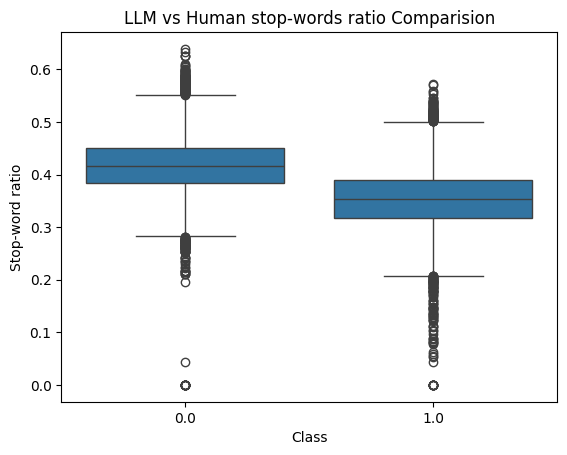

In [18]:
# Create box plot
sns.boxplot(x=final_df['generated'], y=final_df['stop_word_ratio'])

# Set labels and title
plt.xlabel('Class')
plt.ylabel('Stop-word ratio')
plt.title('LLM vs Human stop-words ratio Comparision')

# Show plot
plt.show()

Define a function to calculate complex word ratio

In [19]:
import re

def complex_count(x):
    # Define a regular expression pattern to match vowels
    vowel_pattern = re.compile(r'[aeiouAEIOU]+')
    if len(x)==0:
        return 0
    # Iterate through each word and count syllables
    y = []
    for i in x:
        # Handling exceptions for words ending with "es" or "ed"
        if i.endswith(("es", "ed")):
            syllable_count = len(re.findall(vowel_pattern, i[:-2]))
        else:
            syllable_count = len(re.findall(vowel_pattern, i))
        y.append(syllable_count)
    complex_counts = 0
    for j in range(0, len(y)):
        if y[j] > 2:
            complex_counts += 1  # Accumulate syllable counts greater than 2
        
    return complex_counts/len(x)

In [20]:
final_df['complex_word_ratio']=final_df['word_tokens'].apply(complex_count)

In [21]:
final_df.head()

,text,generated,word_tokens,stop_word_ratio,Number_of_words,complex_word_ratio
0,A Cowboy Who Rode the Waves\n\nTitle: A Cowboy...,1.0,"[A, Cowboy, Who, Rode, the, Waves, Title, :, A...",0.335702,486,0.087034
1,"Mostly everyone is aware of the so called ""glo...",0.0,"[Mostly, everyone, is, aware, of, the, so, cal...",0.429348,326,0.062500
2,"Driverless cars, also known as autonomous veh...",1.0,"[Driverless, cars, ,, also, known, as, autonom...",0.397849,423,0.227957
3,When people ask for advice they usually ask fo...,0.0,"[When, people, ask, for, advice, they, usually...",0.443515,226,0.125523
4,The history of mathematics is filled with inte...,1.0,"[The, history, of, mathematics, is, filled, wi...",0.267241,321,0.252874


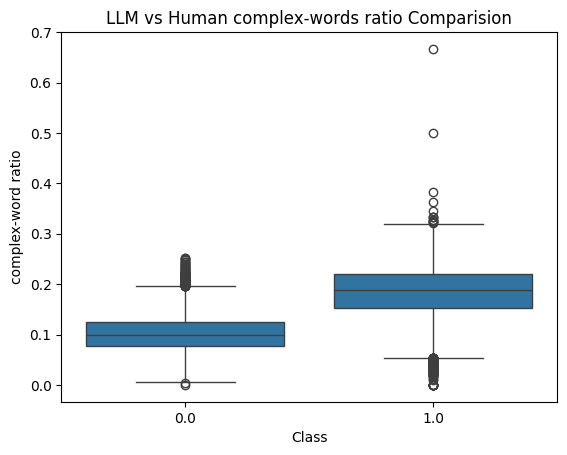

In [22]:
# Create box plot
sns.boxplot(x=final_df['generated'], y=final_df['complex_word_ratio'])

# Set labels and title
plt.xlabel('Class')
plt.ylabel('complex-word ratio')
plt.title('LLM vs Human complex-words ratio Comparision')

# Show plot
plt.show()

Using AVG-TF-IDF as Features

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data to compute TF-IDF values
tfidf_matrix = tfidf_vectorizer.fit_transform(final_df['text'])

# Calculate sum of TF-IDF values for each document
x = tfidf_matrix.sum(axis=1)

In [25]:
df_tfidf= pd.DataFrame(x, columns=['tfidf'])

In [26]:
final_df['Avg_Tf-Idf']=df_tfidf['tfidf']/final_df['Number_of_words']

In [27]:
final_df.head()

,text,generated,word_tokens,stop_word_ratio,Number_of_words,complex_word_ratio,Avg_Tf-Idf
0,A Cowboy Who Rode the Waves\n\nTitle: A Cowboy...,1.0,"[A, Cowboy, Who, Rode, the, Waves, Title, :, A...",0.335702,486,0.087034,0.018817
1,"Mostly everyone is aware of the so called ""glo...",0.0,"[Mostly, everyone, is, aware, of, the, so, cal...",0.429348,326,0.062500,0.035812
2,"Driverless cars, also known as autonomous veh...",1.0,"[Driverless, cars, ,, also, known, as, autonom...",0.397849,423,0.227957,0.024328
3,When people ask for advice they usually ask fo...,0.0,"[When, people, ask, for, advice, they, usually...",0.443515,226,0.125523,0.033575
4,The history of mathematics is filled with inte...,1.0,"[The, history, of, mathematics, is, filled, wi...",0.267241,321,0.252874,0.042527


In [28]:
missing_df=final_df[final_df['Avg_Tf-Idf'].isnull()==True]

In [29]:
missing_df

,text,generated,word_tokens,stop_word_ratio,Number_of_words,complex_word_ratio,Avg_Tf-Idf


In [30]:
final_df=final_df.dropna()

Using Polarity_Score as feature

In [31]:
from textblob import TextBlob

In [32]:
def polarity_score(x):
    y=TextBlob(x)
    return y.sentiment.polarity

In [33]:
final_df['Polarity_Score']=final_df['text'].apply(polarity_score)

Using Subjective_Score as feature

In [34]:
def subjective_score(x):
    y=TextBlob(x)
    return y.sentiment.subjectivity

In [35]:
def count_sentences(corpus):
    try:
        # Tokenize the corpus into sentences
        sentences = nltk.sent_tokenize(corpus)
        num_sentences = len(sentences)
        return num_sentences
    except Exception as e:
        return None

In [36]:
final_df['Subjective_Score']=final_df['text'].apply(subjective_score)

In [37]:
final_df['Number_of_sentences']=final_df['text'].apply(count_sentences)

In [38]:
final_df.head()

,text,generated,word_tokens,stop_word_ratio,Number_of_words,complex_word_ratio,Avg_Tf-Idf,Polarity_Score,Subjective_Score,Number_of_sentences
0,A Cowboy Who Rode the Waves\n\nTitle: A Cowboy...,1.0,"[A, Cowboy, Who, Rode, the, Waves, Title, :, A...",0.335702,486,0.087034,0.018817,0.235943,0.437037,28
1,"Mostly everyone is aware of the so called ""glo...",0.0,"[Mostly, everyone, is, aware, of, the, so, cal...",0.429348,326,0.062500,0.035812,0.078897,0.332990,14
2,"Driverless cars, also known as autonomous veh...",1.0,"[Driverless, cars, ,, also, known, as, autonom...",0.397849,423,0.227957,0.024328,0.144965,0.593229,18
3,When people ask for advice they usually ask fo...,0.0,"[When, people, ask, for, advice, they, usually...",0.443515,226,0.125523,0.033575,0.024366,0.614017,5
4,The history of mathematics is filled with inte...,1.0,"[The, history, of, mathematics, is, filled, wi...",0.267241,321,0.252874,0.042527,0.112871,0.384928,13


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# Separating features and target variable
X = final_df.iloc[:,3:10]
y = final_df['generated']

In [41]:
# Splitting the data into training and temporary data (70% training, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting the temporary data into testing and validation sets (50% testing, 50% validation)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [42]:
# Define a list of possible values for C
C_list = [0.01, 0.1, 1, 10, 100]

# Initialize the best accuracy and the best C
best_acc = 0
best_C = 0

# Loop over the C values
for C in C_list:
    # Create a logistic regression model with the current C
    model = LogisticRegression(C=C)
    # Fit the model on the train set
    model.fit(X_train, y_train)
    # Predict the labels on the validation set
    y_pred = model.predict(X_valid)
    # Compute the accuracy on the validation set
    acc = accuracy_score(y_valid, y_pred)
    # Print the accuracy and the C value
    print(f"Accuracy: {acc}, C: {C}")
    # Update the best accuracy and the best C if needed
    if acc > best_acc:
        best_acc = acc
        best_C = C

# Print the best accuracy and the best C
print(f"Best accuracy: {best_acc}, Best C: {best_C}")

Accuracy: 0.7745333333333333, C: 0.01
Accuracy: 0.8390666666666666, C: 0.1


/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8429333333333333, C: 1
Accuracy: 0.8424, C: 10
Accuracy: 0.8441333333333333, C: 100
Best accuracy: 0.8441333333333333, Best C: 100


/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# Create a logistic regression model with the best C
final_model = LogisticRegression(C=best_C)
# Fit the model on the whole train set
final_model.fit(X_train, y_train)

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [45]:
X.columns

Index(['stop_word_ratio', 'Number_of_words', 'complex_word_ratio',
       'Avg_Tf-Idf', 'Polarity_Score', 'Subjective_Score',
       'Number_of_sentences'],
      dtype='object')

In [46]:
feature_names = ['stop_word_ratio', 'Number_of_words', 'complex_word_ratio',
       'Avg_Tf-Idf', 'Polarity_Score', 'Subjective_Score',
       'Number_of_sentences']

In [47]:
# Retrieve the model parameters (coefficients)
coefficients = final_model.coef_[0]
intercept = final_model.intercept_[0]

# Display coefficients with feature names
print("Intercept:", intercept)
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

Intercept: 0.6510411238324886
stop_word_ratio: -14.59608627611113
Number_of_words: -0.005853481591525254
complex_word_ratio: 31.780465417577332
Avg_Tf-Idf: -1.0219420725587296
Polarity_Score: 1.9025795335847135
Subjective_Score: 4.606149477679758
Number_of_sentences: 0.01078394883874536


In [48]:
# Predict the labels on the test set
y_pred = final_model.predict(X_test)
# Compute the accuracy on the test set
acc = accuracy_score(y_test, y_pred)
# Print the accuracy
print(f"Accuracy: {acc}")

# Compute the confusion matrix on the test set
cm = confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print(cm)

Accuracy: 0.8468
[[3195  532]
 [ 617 3156]]


In [49]:
from sklearn.metrics import confusion_matrix

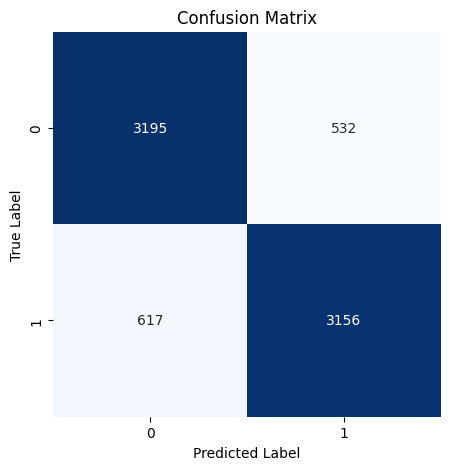

In [50]:
# Assuming you have already computed the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

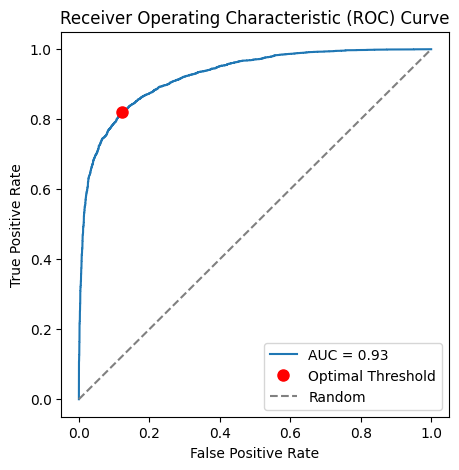

Optimal Threshold: 0.5409162464571884


In [52]:
# Predict probabilities on the test set
y_probs = final_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc = roc_auc_score(y_test, y_probs)

# Find the index of the point with highest TPR and lowest FPR
optimal_idx = np.argmax(tpr - fpr)

# Get the threshold corresponding to the optimal point
optimal_threshold = thresholds[optimal_idx]

# Plot ROC curve with the optimal point
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=8, label='Optimal Threshold')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("Optimal Threshold:", optimal_threshold)


Model-2 Using Deep-Learning: LSTM

In [ ]:
final_df.head()

In [8]:
final_df['Clean_text']=final_df['text'].str.lower()

In [9]:
from nltk.corpus import stopwords

In [10]:
STOPWORDS = set(stopwords.words('english'))

In [11]:
def remove_stopwords(x):
    return " ".join([word for word in x.split() if word not in STOPWORDS])

In [12]:
final_df['Clean_text']=final_df['Clean_text'].apply(lambda y: remove_stopwords(y))

In [13]:
import re

In [14]:
def remove_spl_chars(x):
    x=re.sub('[^a-zA-Z0-9]', ' ', x)
    x=re.sub('\s+', ' ',x)
    return x

In [15]:
final_df['Clean_text']=final_df['Clean_text'].apply(lambda y: remove_spl_chars(y))

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-04-25 05:36:33.383984: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 05:36:33.498282: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-25 05:36:33.503435: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-25 05:36:33.503452: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(final_df['Clean_text'])
word_index = tokenizer.word_index
vocab_size=len(word_index)
vocab_size

81106

In [18]:
def number_of_words(x):
    count=0
    for i in x:
        count=count+1
    return count

In [19]:
final_df['Number_of_words']=final_df['Clean_text'].apply(number_of_words)

In [ ]:
# Plotting directly from DataFrame
final_df['Number_of_words'].plot(kind='hist', bins=range(min(final_df['Number_of_words']), max(final_df['Number_of_words']) + 2), rwidth=0.8, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Number-of-Words')

# Show the plot
plt.show()

In [20]:
final_df['sequences'] = final_df['Clean_text'].apply(lambda x: tokenizer.texts_to_sequences([x])[0])

In [21]:
def pad_sequence(seq):

    return pad_sequences([seq], maxlen=2000, dtype='int32', padding='post',truncating='post')[0]

In [22]:
final_df['Padded_seq'] = final_df['sequences'].apply(pad_sequence)

In [23]:
from sklearn.model_selection import train_test_split

# Assuming final_df['Padded_seq'] is your features and you have a corresponding labels array or column
X_train, X_val, y_train, y_val = train_test_split(final_df['Padded_seq'].tolist(), final_df['generated'], test_size=0.3, random_state=42)


Glove-Word Embedding

In [24]:
# create embedding index
embedding_index = {}
with open(r'glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [25]:
# create embedding matrix
embedding_matrix = np.zeros((vocab_size+1, 100), dtype='float32')
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [26]:
def generate_batches(X, y, batch_size, vocab_size, embedding_matrix):
    total_size = len(X)
    for start in range(0, total_size, batch_size):
        end = min(start + batch_size, total_size)
        # Process each sequence to embeddings and ensure all have the same length
        X_batch = [np.vstack([embedding_matrix[token] for token in seq if token < vocab_size]) for seq in X[start:end]]
        
        # Find the maximum sequence length in this batch
        max_len = max(map(len, X_batch))
        
        # Pad sequences so that each sequence has the same length
        X_batch = np.array([np.pad(seq, ((0, max_len - len(seq)), (0, 0)), mode='constant', constant_values=0) for seq in X_batch])
        
        y_batch = np.array(y[start:end])
        yield X_batch, y_batch

   

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Masking

model = Sequential([
    # Masking layer to ignore the zero paddings in the input
    Masking(mask_value=0., input_shape=(None, 100)),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


2024-04-25 05:37:06.276424: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-25 05:37:06.276463: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (project-instance): /proc/driver/nvidia/version does not exist
2024-04-25 05:37:06.276922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
# Use a smaller batch size
batch_size = 200  # Adjust this based on your system's capability

train_steps = len(X_train) // batch_size  # Recalculate the number of batches
val_steps = len(X_val) // batch_size  # Recalculate the number of batches for validation

history=model.fit(
    generate_batches(X_train, y_train, batch_size,vocab_size,embedding_matrix),
    steps_per_epoch=train_steps,
    validation_data=generate_batches(X_val, y_val, batch_size,vocab_size,embedding_matrix),
    validation_steps=val_steps
)



175/175 [==============================] - 727s 4s/step - loss: 0.2130 - accuracy: 0.9247 - val_loss: 0.1302 - val_accuracy: 0.9583


In [31]:
# Extracting loss and accuracy from the training set
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Extracting loss and accuracy from the validation set
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Print or plot the results
print("Training Loss: ", train_loss)
print("Training Accuracy: ", train_accuracy)
print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_accuracy)


Training Loss:  [0.21300531923770905]
Training Accuracy:  [0.9246857166290283]
Validation Loss:  [0.1302489936351776]
Validation Accuracy:  [0.9583333134651184]


In [32]:
# Assuming you have a validation set ready: X_val, y_val
import numpy as np

# Generate predictions for the validation set
predictions = model.predict(generate_batches(X_val, y_val, batch_size, vocab_size, embedding_matrix), steps=val_steps)
# Convert probabilities to class labels based on a threshold
predicted_classes = (predictions > 0.5).astype(int)


75/75 [==============================] - 131s 2s/step


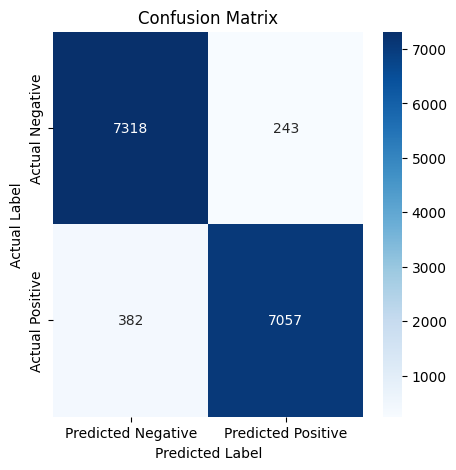

In [34]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_val, predicted_classes)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
